<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/CNN_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLASSIFICATION OF IMAGES USING CNN

## https://www.cs.toronto.edu/~kriz/cifar.html

## The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Classes are -
airplane | automobile	| bird |cat
deer | dog | frog | horse |ship	| truck
## We will use Keras to classify image as per defined class

## IMPORT LIBRARIES

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#LOAD DATASET IN TRAIN AND TEST

In [34]:
from keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data() # This pull the dataset of our interest

In [35]:
print("X train shape :", xtrain.shape)
print("y train shape :", ytrain.shape)
print("X test shape  :", xtest.shape)
print("y test shape  :", ytest.shape)

X train shape : (50000, 32, 32, 3)
y train shape : (50000, 1)
X test shape  : (10000, 32, 32, 3)
y test shape  : (10000, 1)


## SO here have input xtrain and xtest in required format (TotalSamples, height, width,TotalChannels)  Hence no need to reshape input set


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
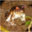

In [36]:
xtrain[0]

In [37]:
xtrain

#input has 3 channel (RGB) values ranging from 0 to 255
# We need to normalise it by dividing by 255

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

#Normilise image. to scale of 255

In [38]:

# normalizing the data to help with the training
xtrain = xtrain /255
xtest = xtest/255

In [39]:
xtrain[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [40]:
np.unique(ytrain)

# so we have values from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Output Y is numpy array with 0to 9 values. we would need to convert it into 1 and 0s.
## will perform OHE. As this is numpy array, we shall use method to_categorical()
#### get_dummies will work on dataframes.Hence not using it here.

In [41]:
from keras.utils import to_categorical

n_classes = 10  # as y has 0 to 9 =10 classes

ytrain = to_categorical(ytrain, n_classes)
ytest  =  to_categorical(ytest, n_classes)
ytrain.shape, ytest.shape

((50000, 10), (10000, 10))

Train and Validation Split
We will split this xtrain ytrain into, x_train and x_val similarly, y_train and y_val and fit the model.
Once model is ready we shall apply this on xtest to see the predictions

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(xtrain,ytrain,test_size=0.1,random_state=7)

print(f'x_train {x_train.shape}')
print(f'x_val {x_val.shape}')
print(f'y_train {y_train.shape}')
print(f'y_val {y_val.shape}')


x_train (45000, 32, 32, 3)
x_val (5000, 32, 32, 3)
y_train (45000, 10)
y_val (5000, 10)


#Building model

In [43]:
model = Sequential()  # Stack up all layer sequentially.

# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())   # flatten output of convolutional layer

model.add(Dense(64, activation='relu'))  # FC layer
# output layer
model.add(Dense(10, activation='softmax')) #FC layer at output . at output layer neurons should be equal to number of classes and activation Softmax for multiclass
                                           # and sigmoid for binary class

In [44]:
model.summary(line_length=100)

Model: "sequential_1"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_1 (Conv2D)                           (None, 30, 30, 32)                      896            
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 30, 30, 32)                      0              
                                                                                                    
 flatten_1 (Flatten)                         (None, 28800)                           0              
                                                                                                    
 dense_2 (Dense)                             (None, 64)                              1843264        
                                                                     

#Compilation

In [45]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Multiclass - loss fuction should be categorical_crossentropy  for binary class - binary_crossentropy

In [46]:
training_logs=model.fit(x_train,y_train,validation_split=0.10,batch_size=32, epochs=15)  #Fitting the model and saving corrosponding values in variable 'history'



Epoch 1/15
1266/1266 [==============================] - 71s 55ms/step - loss: 1.6263 - accuracy: 0.4074 - val_loss: 1.3901 - val_accuracy: 0.5044
Epoch 2/15
1266/1266 [==============================] - 53s 42ms/step - loss: 1.2820 - accuracy: 0.5422 - val_loss: 1.3108 - val_accuracy: 0.5371
Epoch 3/15
1266/1266 [==============================] - 55s 44ms/step - loss: 1.1638 - accuracy: 0.5900 - val_loss: 1.2628 - val_accuracy: 0.5551
Epoch 4/15
1266/1266 [==============================] - 53s 42ms/step - loss: 1.0838 - accuracy: 0.6180 - val_loss: 1.2548 - val_accuracy: 0.5629
Epoch 5/15
1266/1266 [==============================] - 54s 43ms/step - loss: 1.0103 - accuracy: 0.6459 - val_loss: 1.2745 - val_accuracy: 0.5627
Epoch 6/15
1266/1266 [==============================] - 53s 42ms/step - loss: 0.9520 - accuracy: 0.6662 - val_loss: 1.2959 - val_accuracy: 0.5571
Epoch 7/15
1266/1266 [==============================] - 55s 44ms/step - loss: 0.8905 - accuracy: 0.6881 - val_loss: 1.3144 -

In [47]:
training_logs.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

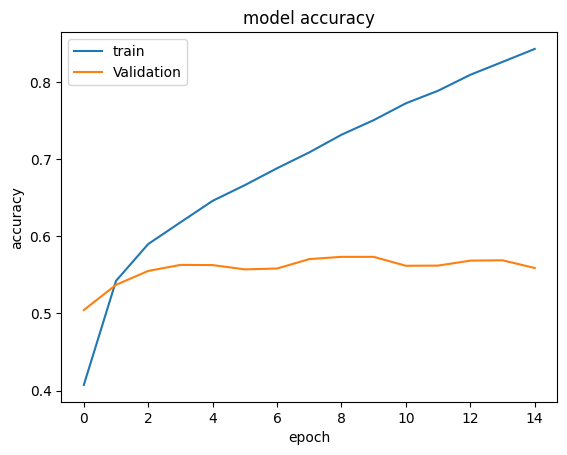

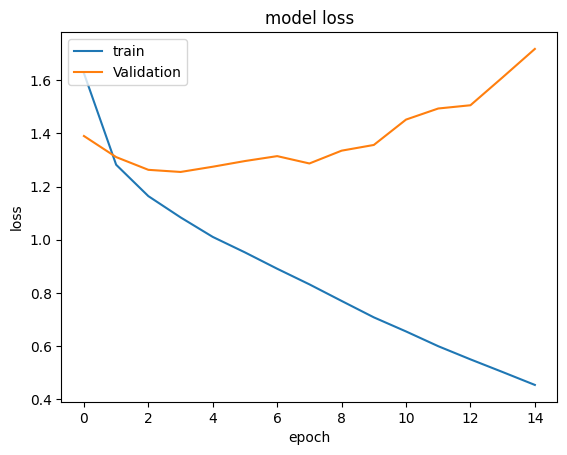

In [48]:
import matplotlib.pyplot as plt
plt.plot(training_logs.history['accuracy'])
plt.plot(training_logs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(training_logs.history['loss'])
plt.plot(training_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

## Traning and validation accuracy after final epoch

In [49]:
training_logs.history['accuracy'][-1],training_logs.history['val_accuracy'][-1],training_logs.history['loss'][-1],training_logs.history['val_loss'][-1]

(0.8426913619041443,
 0.5588889122009277,
 0.45324715971946716,
 1.7178937196731567)

##PREDICTION

In [50]:
xtest.shape

(10000, 32, 32, 3)

In [51]:
ypred=model.predict(xtest)

313/313 [==============================] - 3s 10ms/step


##evalute loss and accuracy on test set

In [52]:
test_loss, test_acc = model.evaluate(xtest, ytest)

313/313 [==============================] - 4s 13ms/step - loss: 1.7005 - accuracy: 0.5645


In [53]:
test_loss, test_acc

(1.7005019187927246, 0.5644999742507935)

##Confusion Matrix

In [54]:
ypred

array([[3.90002280e-02, 2.65581406e-07, 1.57735404e-02, ...,
        3.35686964e-05, 5.98689429e-02, 1.02777437e-06],
       [4.89733029e-05, 4.65415031e-01, 1.42160497e-08, ...,
        6.93791248e-12, 5.32991171e-01, 1.54438778e-03],
       [5.27454615e-01, 5.56425564e-03, 1.60927931e-03, ...,
        6.96502067e-03, 4.36514437e-01, 2.05254648e-02],
       ...,
       [1.01120497e-06, 2.20438168e-10, 1.53342560e-01, ...,
        1.97974052e-02, 3.55640987e-05, 2.10471217e-06],
       [2.24366859e-02, 1.90047562e-01, 4.85979803e-02, ...,
        6.04303256e-02, 1.13341585e-08, 9.21455430e-05],
       [2.77536201e-05, 1.40285474e-05, 1.13548688e-03, ...,
        3.45869780e-01, 1.18164724e-04, 9.53098206e-05]], dtype=float32)

In [55]:
ypred_class = np.argmax(ypred, axis=1)
ypred_class

array([3, 8, 0, ..., 5, 3, 4])

In [56]:
ytest_class = np.argmax(ytest, axis=1)
ytest_class

array([3, 8, 8, ..., 5, 1, 7])

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest_class, ypred_class)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[598  15  74  15   8   8  22  42 153  65]
 [ 34 619   7  14   5   8  15  24  67 207]
 [ 83   9 390  69  96  62 117 109  35  30]
 [ 35   9  86 329  82 151 124 121  27  36]
 [ 40   6 122  78 408  35 115 170  18   8]
 [ 16  12  78 176  36 412  58 174  23  15]
 [ 13  22  42  52  45  24 734  44   7  17]
 [ 16   8  25  39  49  57  24 750   8  24]
 [ 91  49  17  14   7  10  14  18 714  66]
 [ 43 107  12  14   5   6  16  59  47 691]]


# Image classification for user given image.

##Defining list for label/class which we have

In [58]:
# Existing labels mapping


class_labels= {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
               6:'frog',7:'horse',8:'ship',9:'truck',
}



## Creating function for prediction

In [59]:
def func_prediction(model,xinput):
  xinput=xinput.reshape(1,32,32,3) # reshape. 1 is needed to cnn to work with 4D vector.
  pred=model.predict(xinput)
  return pred

In [60]:
xinput=xtest[1000]  # For now just taking vector from xtest set and applying as user input

pred=func_prediction(model,xinput)
pred

1/1 [==============================] - 0s 37ms/step


array([[1.0420562e-06, 5.1057599e-03, 2.3373723e-01, 2.8210818e-03,
        1.1144556e-04, 7.5455904e-01, 1.7570745e-03, 5.5381522e-04,
        3.8398844e-07, 1.3531168e-03]], dtype=float32)

In [61]:
pred_class = np.argmax(pred, axis=1)  ## argmax reverts OHE values to its orginal one.
pred_class

#This is giving the class of  output  for given xinput. ie class 3

array([5])

### Decoding this class label

In [62]:
#variable pred_class is numpy array,  extract value of 0th postion ie 3 and store and index

# get the lable at that index number from class_labels

pred_class_index = pred_class[0]
pred_label = class_labels.get(pred_class_index)
pred_class_index, pred_label

(5, 'dog')

## Visualisation

Text(0.5, 0, 'dog')

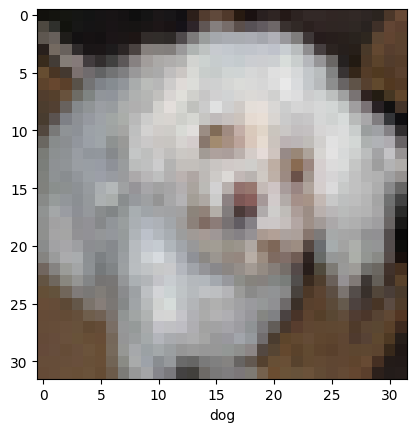

In [63]:
plt.imshow(xinput)
plt.xlabel(pred_label)


#Saving the Trained model using pickle

In [65]:
import pickle

with open('CNN_CIFAR_10.pkl', 'wb') as f:
    pickle.dump(model, f)